# Prédiction des taux directeurs à l'aide des discours de la FED

## I - EDA

### 1 - Librairies

In [1]:
pip install gensim==4.3.0 scipy==1.9.3

In [2]:
pip install xgboost

In [3]:
pip install datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

In [4]:
pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
pip install datasets optuna "ray[tune]" evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 11.7 MB/s eta 0:00:00


In [ ]:
#from google.colab import drive
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Zoom EDA
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

#Nettoyage
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Modélisation basée sur représentation vectorielle TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score,precision_recall_fscore_support

##Modèle TF-IDF + MNB
from sklearn.naive_bayes import MultinomialNB

##Modèle LR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

##Modèle SVM
from sklearn.svm import SVC

#Modélisation basée sur embeddings Word2Vec
import gensim.downloader as api
from xgboost import XGBClassifier

#Modèles neuronaux

##FinBERT
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset
import evaluate
from transformers import EarlyStoppingCallback
from ray import tune

c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-24 18:40:05,571	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-24 18:40:06,082	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### 2 - Data importation

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

Mounted at /content/drive


#### Charger les données en local

In [ ]:
path_96_20 = r"DATA\fed_speeches_1996_2020.csv"
df = pd.read_csv(path_96_20)

In [ ]:
path_rates = r'DATA\fed_speeches_1996_2024.csv'
df_rates = pd.read_csv(path_rates)

#### Charger les données depuis drive

In [ ]:
"""path_96_20 = r"/content/drive/MyDrive/NLP/DATA/fed_speeches_1996_2024.csv"
df = pd.read_csv(path_96_20)"""

In [ ]:
"""path_rates = r'/content/drive/MyDrive/NLP/DATA/FEDFUNDS.csv'
df_rates = pd.read_csv(path_rates)"""

### 3 - Statistiques globales

In [ ]:
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1821 non-null   object
 1   title    1822 non-null   object
 2   speaker  1820 non-null   object
 3   text     1823 non-null   object
dtypes: object(4)
memory usage: 57.1+ KB
None
date       1508
title      1562
speaker      43
text       1815
dtype: int64


In [ ]:
print(df_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  362 non-null    object 
 1   FEDFUNDS          362 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


### 4 - Data transformation

#### Format dates

In [4]:
def preprocess_dates(df, df_rates):

    df = df.dropna(subset=["date"]).copy()
    df["date"] = pd.to_datetime(df["date"], errors='coerce')
    df["date_cible"] = df["date"] + pd.offsets.MonthBegin(1)
    df = df.rename(columns={"date": "date_speech"})
    df_rates["observation_date"] = pd.to_datetime(df_rates["observation_date"])

    return df, df_rates

In [ ]:
df, df_rates= preprocess_dates(df, df_rates)

In [ ]:
df.head(2)

,date_speech,title,speaker,text,date_cible
0,1996-06-13,Bank supervision in a world economy,Chairman Alan Greenspan,Remarks by Chairman Alan Greenspan Bank superv...,1996-07-01
1,1996-06-18,Developments in electronic money and banking,"Governor Edward W. Kelley, Jr.","Remarks by Governor Edward W. Kelley, Jr. Deve...",1996-07-01


#### Labélisation

In [6]:
def process_fedfunds(df_rates):

    df_rates["Diff"] = df_rates["FEDFUNDS"].diff()
    df_rates["FEDFUNDS_classes"] = df_rates["Diff"].apply(
        lambda x: "Augmentation" if x > 0 else ("Baisse" if x < 0 else "Stable"))
    df_rates = pd.get_dummies(df_rates, columns=["FEDFUNDS_classes"], prefix="FEDFUNDS")
    fedfunds_cols = [col for col in df_rates.columns if col.startswith("FEDFUNDS_")]
    df_rates[fedfunds_cols] = df_rates[fedfunds_cols].astype(int)
    df_rates = df_rates.dropna(subset=["Diff"])
    mean_diff = df_rates["Diff"].mean()
    print(f"Moyenne des variations du taux directeur : {mean_diff:.4f}")

    return df_rates


In [7]:
df_rates = process_fedfunds(df_rates)

Moyenne des variations du taux directeur : -0.0033


**Visualisation de l'évolution des taux directeurs de la FED**

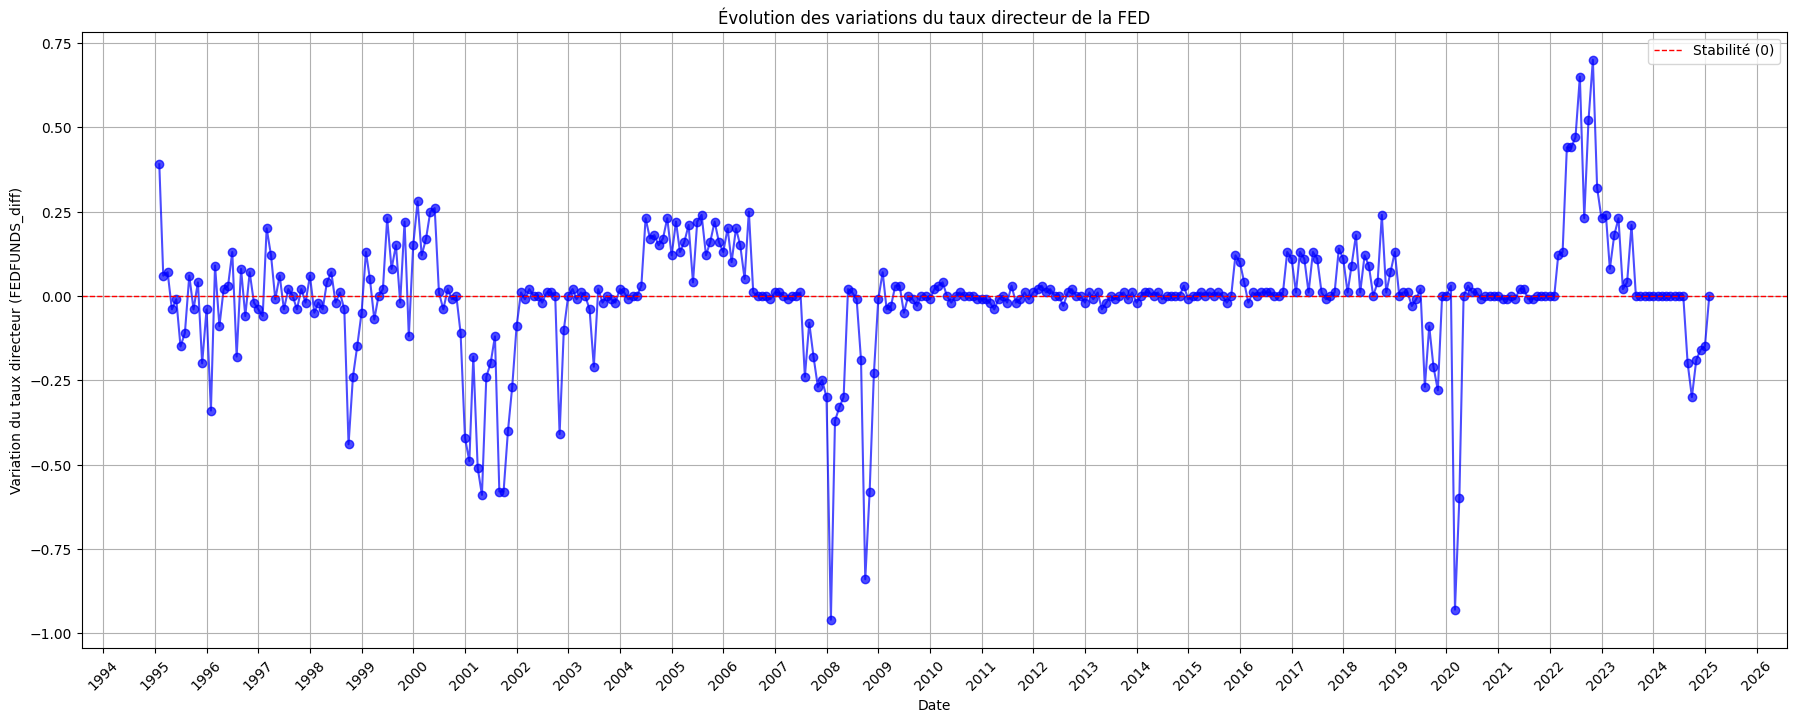

In [23]:
plt.figure(figsize=(22, 8))
plt.plot(df_rates["observation_date"], df_rates["Diff"], marker="o", linestyle="-", color="b", alpha=0.7)
plt.axhline(0, color="red", linestyle="dashed", linewidth=1, label="Stabilité (0)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xlabel("Date")
plt.ylabel("Variation du taux directeur (FEDFUNDS_diff)")
plt.title("Évolution des variations du taux directeur de la FED")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


**Distribution des classes**

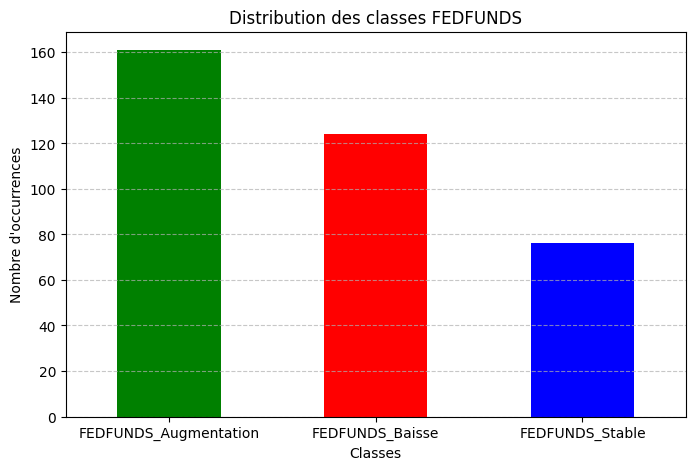

In [ ]:
class_counts = df_rates[["FEDFUNDS_Augmentation", "FEDFUNDS_Baisse", "FEDFUNDS_Stable"]].sum()

plt.figure(figsize=(8, 5))
class_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.xlabel("Classes")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes FEDFUNDS")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 5 - Concaténation des dataframes

In [8]:
df_merged= pd.merge(df, df_rates, left_on="date_cible", right_on="observation_date", how="inner")
df_merged.drop(columns=["observation_date"], inplace=True)
df= df_merged

In [ ]:
df.shape

(1821, 10)

### 6 - Zoom EDA

#### Fréquence stopwords corpus complet

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def get_most_frequent_words(texts, stop_words):
    all_words = []
    for text in texts:
        words = re.findall(r'\b\w+\b', str(text).lower())
        filtered_words = [word for word in words if word not in stop_words]  # Supprime les stopwords
        all_words.extend(filtered_words)

    return Counter(all_words).most_common(20)  # Retourne les 20 mots les plus fréquents
common_words= get_most_frequent_words(df["text"], stop_words)

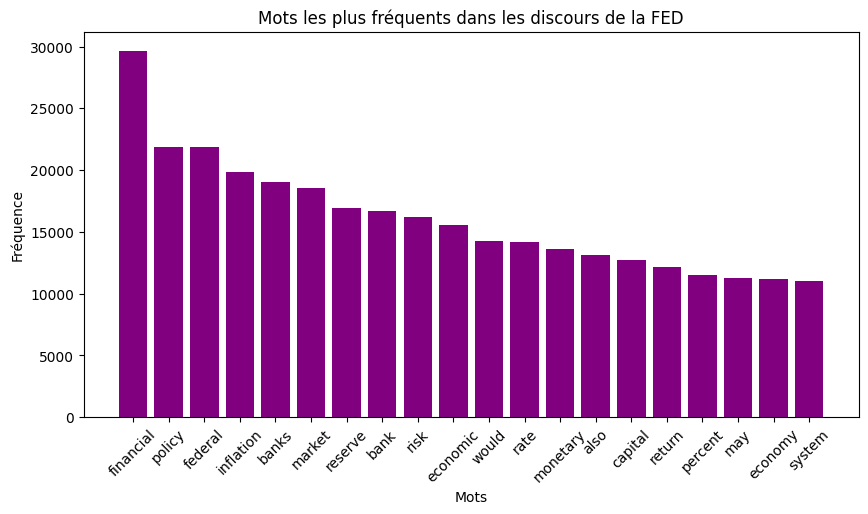

In [11]:
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="purple")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.title("Mots les plus fréquents dans les discours de la FED")
plt.xticks(rotation=45)
plt.show()

#### Fréquence stopwords par classe

In [ ]:
texts_augmentation= df[df["FEDFUNDS_Augmentation"] == 1]["text"]
texts_baisse= df[df["FEDFUNDS_Baisse"] == 1]["text"]
texts_stable= df[df["FEDFUNDS_Stable"] == 1]["text"]

def get_top_words(texts, stop_words, top_n=20):
    all_words = []
    for text in texts.dropna():
        words = re.findall(r'\b\w+\b', text.lower())
        filtered_words = [word for word in words if word not in stop_words]
        all_words.extend(filtered_words)

    return Counter(all_words).most_common(top_n)

top_words_augmentation = get_top_words(texts_augmentation, stop_words)
top_words_baisse = get_top_words(texts_baisse, stop_words)
top_words_stable = get_top_words(texts_stable, stop_words)

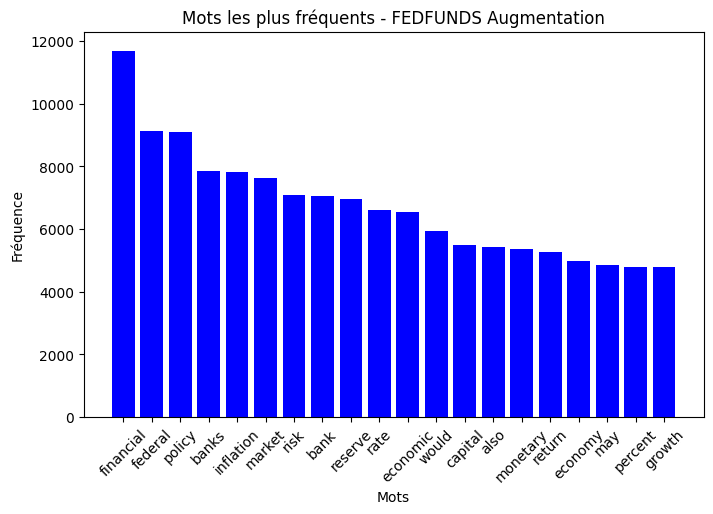

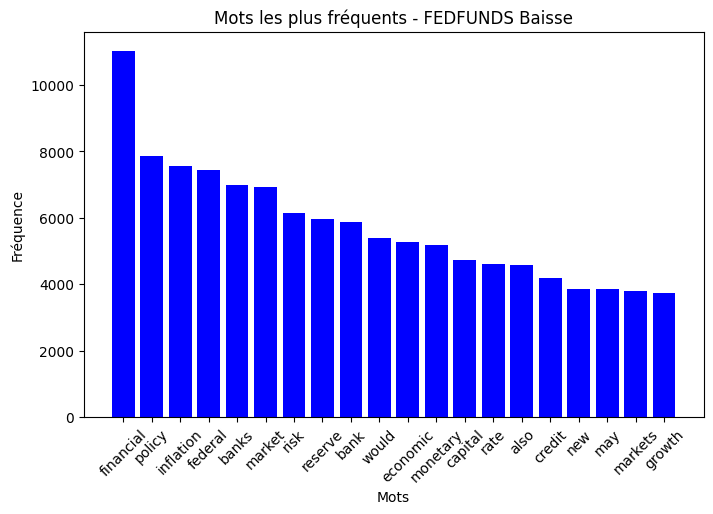

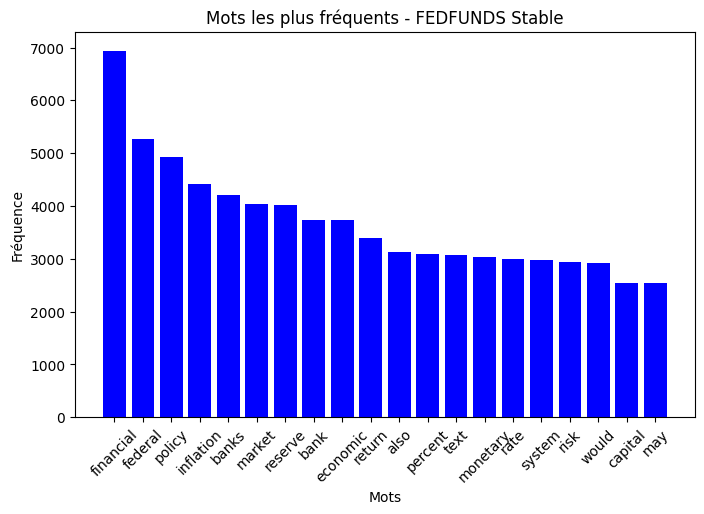

In [ ]:
def plot_top_words(top_words, title):
    words, counts = zip(*top_words)

    plt.figure(figsize=(8, 5))
    plt.bar(words, counts, color="blue")
    plt.xlabel("Mots")
    plt.ylabel("Fréquence")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(top_words_augmentation, "Mots les plus fréquents - FEDFUNDS Augmentation")
plot_top_words(top_words_baisse, "Mots les plus fréquents - FEDFUNDS Baisse")
plot_top_words(top_words_stable, "Mots les plus fréquents - FEDFUNDS Stable")

## II - Modélisation

### 1 - Etat de l'art

#### 1. Modèles basés sur des représentations vectorielles

##### Naïve Bayes (NB) :
Les modèles Naïve Bayes, comme le **Multinomial Naïve Bayes**, s’appuient sur la règle de Bayes et supposent l’indépendance conditionnelle des mots. Malgré cette hypothèse simplificatrice, ces modèles sont performants sur de petits corpus et avec des représentations telles que **Bag-of-Words (BoW)** ou **TF-IDF**.  

- **Avantages** : rapide, robuste sur des données limitées  
- **Limites** : forte dépendance à l’hypothèse d’indépendance des mots  

##### Régression Logistique (LR)  
Approche linéaire qui optimise une fonction logistique pour classifier les textes. Son efficacité dépend fortement de la qualité des représentations vectorielles utilisées (**TF-IDF, BoW**). Elle est souvent plus performante que Naïve Bayes lorsque les relations entre mots sont plus complexes.  

- **Avantages** : interprétable, efficace sur des corpus de taille moyenne  
- **Limites** : linéarité, sensible aux données bruitées  

##### Support Vector Machines (SVM)
Les SVM sont bien adaptés à la classification de texte en raison de leur capacité à maximiser la séparation entre les classes dans des espaces de grande dimension. Ils sont souvent utilisés avec **TF-IDF** pour une meilleure généralisation.  

- **Avantages** : robuste aux données bruitées, efficace avec peu de données  
- **Limites** : coûteux en calcul sur de très grands corpus

Dans notre cas, nous avons décidé de réaliser un modèle TF-IDF + LR et TF-IDF + SVM. Pourquoi TF-IDF et pas BoW ?
Le TF-IDF utilise BoW (transforme un texte en un vecteur de fréquences de mots) mais pondère les mots en fonction de leur importance dans le corpus.
Mots rares et informatifs ont un poids plus élevé.


#### 2️. Modèles basés sur des représentations avancées

##### Word Embeddings (Word2Vec ou GloVe)
Contrairement aux méthodes classiques, ces modèles apprennent des représentations continues des mots dans un espace vectoriel, capturant des relations sémantiques et syntaxiques.  

- **Word2Vec** : basé sur des architectures **CBOW** et **Skip-gram**, il permet d’apprendre des représentations contextuelles.  
- **GloVe** : utilise la co-occurrence globale des mots dans un corpus pour obtenir des vecteurs denses.  

- **Avantages** : capture les relations sémantiques  
- **Limites** : nécessite un grand corpus pour être efficace  


#### 3️. Modèles neuronaux

##### Réseaux de neurones récurrents (RNN, LSTM, GRU)
Les **RNN** et leurs variantes comme **LSTM** et **GRU** sont capables de capturer des relations séquentielles et contextuelles dans les textes. Ils sont adaptés aux tâches de classification où l’ordre des mots est important.  

- **Avantages** : capture les dépendances contextuelles  
- **Limites** : entraînement lent, problème de gradient évanescent  

##### Transformers (BERT, GPT)
L’introduction des **Transformers** a révolutionné la classification de texte. Des modèles comme **BERT** utilisent des mécanismes d’attention pour comprendre le contexte global d’un texte. Fine-tunés sur des tâches spécifiques, ils surpassent les méthodes classiques en performance.  

- **Avantages** : compréhension fine du contexte, meilleures performances  
- **Limites** : coûteux en calcul, besoin de grands volumes de données  

### 2 - Nettoyage des données

In [ ]:
nltk.download("punkt")
nltk.download("wordnet")
stop_words= set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

def clean_text(text):

    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### b) Vectorisation

In [13]:
def get_fedfunds_class(row):
    if row["FEDFUNDS_Augmentation"] == 1:
        return "Augmentation"
    elif row["FEDFUNDS_Baisse"] == 1:
        return "Baisse"
    else:
        return "Stable"

df["FEDFUNDS_Classe"] = df.apply(get_fedfunds_class, axis=1)

In [14]:
y= df["FEDFUNDS_Classe"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X= df["clean_text"]

**Définition de la structure d'évaluation des modèles**

In [ ]:
def run_model_evaluation(model_name, model, X_train, y_train, X_test, y_test, cv, label_encoder):
    print(f"\n=== Évaluation du modèle {model_name} ===\n")

    all_fold_reports = []
    balanced_accuracies = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
        print(f"Traitement du fold {fold+1}/{cv.n_splits}...")

        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_fold_train, y_fold_train)

        y_pred = model.predict(X_fold_val)

        precision, recall, f1, support = precision_recall_fscore_support(
            y_fold_val, y_pred, labels=range(len(label_encoder.classes_)), zero_division=0
        )

        report_df = pd.DataFrame({
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'support': support
        }, index=label_encoder.classes_)

        all_fold_reports.append(report_df)
        balanced_accuracies.append(balanced_accuracy_score(y_fold_val, y_pred))

    avg_report= pd.concat(all_fold_reports).groupby(level=0).mean()
    macro_avg= avg_report[['precision', 'recall', 'f1-score']].mean()
    total_support= avg_report['support'].sum()
    weighted_avg= (avg_report[['precision', 'recall', 'f1-score']].multiply(avg_report['support'], axis=0).sum()) / total_support

    avg_report.loc['macro avg'] = list(macro_avg) + [avg_report['support'].mean()]
    avg_report.loc['weighted avg'] = list(weighted_avg) + [total_support]
    avg_report= avg_report.round(4)
    print(f"\nScore F1 macro (validation croisée sur X_train) : {macro_avg['f1-score']:.4f}")
    print(f"\n=== Rapport de classification moyen ({model_name}, {cv.n_splits} folds sur train) ===\n")
    print(avg_report)
    print(f"\nPrécision équilibrée moyenne : {np.mean(balanced_accuracies):.4f}")

    print(f"\nEntraînement du modèle {model_name} final sur l'ensemble des données d'entraînement...")
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)

    test_precision, test_recall, test_f1, test_support = precision_recall_fscore_support(
        y_test, y_test_pred, labels=range(len(label_encoder.classes_)), zero_division=0
    )

    test_report_df = pd.DataFrame({
        'precision': test_precision,
        'recall': test_recall,
        'f1-score': test_f1,
        'support': test_support}, index=label_encoder.classes_)

    test_macro_avg= test_report_df[['precision', 'recall', 'f1-score']].mean()
    test_total_support= test_report_df['support'].sum()
    test_weighted_avg= (test_report_df[['precision', 'recall', 'f1-score']].multiply(test_report_df['support'], axis=0).sum()) / test_total_support

    test_report_df.loc['macro avg'] = list(test_macro_avg) + [test_report_df['support'].mean()]
    test_report_df.loc['weighted avg'] = list(test_weighted_avg) + [test_total_support]
    test_report_df = test_report_df.round(4)

    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    print(f"\n=== Évaluation sur l'ensemble de test ({model_name}) ===\n")
    print(f"Score F1 macro (test) : {test_macro_avg['f1-score']:.4f}")
    print(f"Précision équilibrée sur test : {test_balanced_acc:.4f}")
    print("\nRapport de classification sur l'ensemble de test :\n")
    print(test_report_df)

    return model, avg_report, test_report_df, np.mean(balanced_accuracies), test_balanced_acc

### 3 - Modélisation basée sur des représentations vectorielles

#### a) Vectorisation et séparation

CountVectorizer pour Naive Bayes

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2)
X_counts= count_vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_counts, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

TF-IDF pour Naive Bayes, LR et SVM

In [ ]:
tfidf_vectorizer= TfidfVectorizer(ngram_range=(1,2), max_features=10000, min_df=2)
X_tfidf= tfidf_vectorizer.fit_transform(X)

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

Hyper paramètres du TF IDF :
- **ngram_range** : Cgarde à la fois les unigrammes (1 mot) et les bigrammes (2 mots consécutifs).
- **max_features** : garde les 10 000 ngrams les plus fréquents (selon leur score tdidf).
- **min_df** :  ignore n-grammes qui apparaissent dans moins de 2 documents.

#### b) Multinomial Naïve Bayes

Attention : nos classes sont déséquilibrées

In [ ]:
class_counts= pd.Series(y_train).map(lambda idx: label_encoder.inverse_transform([idx])[0]).value_counts()
class_weights= {cls: 1/class_counts[cls] for cls in label_encoder.classes_}
class_prior= np.array([class_weights[cls] for cls in label_encoder.classes_])
class_prior= class_prior/class_prior.sum()

In [17]:
print(f"Probabilités a priori ajustées: {class_prior}")

Probabilités a priori ajustées: [0.24122715 0.30790782 0.45086503]


In [ ]:
cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #prévient le surapprentissag

In [ ]:
nb_model= MultinomialNB(class_prior=class_prior)

In [ ]:
nb_results= run_model_evaluation("Naive Bayes",nb_model,X_train, y_train,X_test, y_test,cv,label_encoder)


=== Évaluation du modèle Naive Bayes ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation croisée sur X_train) : 0.4499

=== Rapport de classification moyen (Naive Bayes, 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5357  0.4108    0.4646  125.6000
Baisse           0.4610  0.4696    0.4645   98.4000
Stable           0.3589  0.5089    0.4205   67.2000
macro avg        0.4519  0.4631    0.4499   97.0667
weighted avg     0.4697  0.4533    0.4544  291.2000

Précision équilibrée moyenne : 0.4631

Entraînement du modèle Naive Bayes final sur l'ensemble des données d'entraînement...

=== Évaluation sur l'ensemble de test (Naive Bayes) ===

Score F1 macro (test) : 0.4401
Précision équilibrée sur test : 0.4620

Rapport de classification sur l'ensemble de test :

              precision  recall  f1-score   support
Augmentation     0.4950

**Conclusions du modèle Multinomial Naive Bayes :**

- *1ère constatation* : Nous observons un biais vers la classe Augmentation. Malgré l'ajustement des probabilités a priori (class_prior), le modèle présente une forte tendance à classer les discours de la FED comme annonçant des augmentations de taux, même lorsqu'ils annoncent en réalité des baisses ou une stabilité.
- *2de constatation* : On a une faible performance sur Stable. Cette classe étant la moins représentée initialement dans notre dataset, elle est particulièrement mal identifiée, avec seulement 10 classifications correctes sur 84 cas réels.
- *3ème constatation* : L'hypothèse d'indépendance avancée par le modèle Naive Bayes suppose l'indépendance entre les mots, hypothèse rarement vérifiée dans le langage naturel et particulièrement dans des discours économiques structurés comme les discours de la FED.
- *Quelques chiffres clefs* :
    - F1 macro moyen : 0.4507 -> performance moyenne sur l’ensemble des classes, sans tenir compte du déséquilibre.
    - Précision équilibrée : 0.4483 -> le modèle traite les classes avec une efficacité modérée mais équitable.
    - Weighted avg F1 : 0.4739 -> le modèle réussit un peu mieux sur les classes majoritaires.

Interprétation : Le modèle fait preuve de cohérence globale, mais reste limité dans sa capacité à capturer les nuances des classes, notamment les moins fréquentes.

#### c) Regression logistique

In [ ]:
param_grid= {'C': [0.01, 0.1, 1, 10, 100],'solver': ['liblinear', 'saga'],'penalty': ['l1', 'l2']}

In [ ]:
lreg= LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
print("\nExécution de Grid Search pour Régression Logistique...")
grid = GridSearchCV(estimator=lreg,param_grid=param_grid, scoring='f1_macro',cv=5, n_jobs=-1,verbose=1)
grid.fit(X_train, y_train)


Exécution de Grid Search pour Régression Logistique...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1_macro', verbose=1)

In [ ]:
print("\nMeilleurs hyperparamètres trouvés :")
print(grid.best_params_)
print(f"Score F1 macro (CV Grid Search) : {grid.best_score_:.4f}")


Meilleurs hyperparamètres trouvés :
{'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Score F1 macro (CV Grid Search) : 0.4849


Les classes étant déséquilibrées, on va préférer le f1_macro comme critère d'évaluation. Il permet de :

- Calculer le F1 pour chaque classe séparément,
- Faire la moyenne de ces F1 sans tenir compte de la taille des classes.

=> Cela permet d’évaluer l'équité du modèle entre les classes, même si une classe est sous-représentée.

In [ ]:
best_lreg= grid.best_estimator_ #meilleur modele

In [ ]:
lr_results = run_model_evaluation(
    "Régression Logistique (optimisée)",
    best_lreg,
    X_train, y_train,
    X_test, y_test,
    cv,
    label_encoder)


=== Évaluation du modèle Régression Logistique (optimisée) ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation croisée sur X_train) : 0.4700

=== Rapport de classification moyen (Régression Logistique (optimisée), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5524  0.5827    0.5665  125.6000
Baisse           0.4606  0.4776    0.4685   98.4000
Stable           0.4117  0.3452    0.3749   67.2000
macro avg        0.4749  0.4685    0.4700   97.0667
weighted avg     0.4889  0.4924    0.4892  291.2000

Précision équilibrée moyenne : 0.4685

Entraînement du modèle Régression Logistique (optimisée) final sur l'ensemble des données d'entraînement...

=== Évaluation sur l'ensemble de test (Régression Logistique (optimisée)) ===

Score F1 macro (test) : 0.4913
Précision équilibrée sur test : 0.4918

Rapport de classification sur l'ensembl

**Conclusions du modèle Regression logistique (TF-IDF) :**

- *1ère constatation* : La F1 macro en validation croisée (0.4849) et la F1 macro sur le test (0.49) sont très proches donc le modèle généralise bien et n’a pas surappris les données d’entraînement.

- *2de constatation* :  La régression logistique donne des scores homogènes sur les trois classes avec des F1-score entre 0.47 et0.51 pour chaque classe.
Contrairement au Naive Bayes qui favorisait la classe majoritaire. => Bonnes performances grâce à class_weight='balanced', et une capacité du modèle à gérer le déséquilibre des données.

- *3ème constatation* : L’accuracy et le F1-score global restent autour de 0.50, cela indique que le modèle capte une structure informative dans les textes, mais atteint une limite de complexité.

**Conclusions du modèle Regression logistique (CountVectorizer)) :**

- *1ère constatation* : Amélioration des performances générales par rapport à la version précédente avec TF-IDF. Score F1 macro (test) : 0.4401 (vs 0.4189 avec TF-IDF).
- *2de constatation* : Pas d'overfitting observé : les performances en validation croisée et sur le test sont proches (F1 macro train = 0.4499 ; test = 0.4401).
- *3ème constatation* : Le modèle reconnaît beaucoup mieux cette classe, auparavant négligée. (F1-score passe de 0.3538 → 0.4677 et le (recall) monte fortement : de 0.27 → 0.56).

#### d) SVM

In [ ]:
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')

In [ ]:
param_grid = {'C': [0.1, 1],#régularisation forte (0.1) ou moyenne (1)
    'kernel': ['linear', 'rbf'],'gamma': ['scale']}

In [ ]:
print("\nExécution de Grid Search pour SVM...")
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)


Exécution de Grid Search pour SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy', verbose=1)

In [ ]:
print(f"Meilleurs paramètres SVM: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

Meilleurs paramètres SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svm_results = run_model_evaluation(
    "SVM (optimisé)",best_svm,
    X_train, y_train, X_test, y_test,
    cv,label_encoder)


=== Évaluation du modèle SVM (optimisé) ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation croisée sur X_train) : 0.4741

=== Rapport de classification moyen (SVM (optimisé), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5692  0.4793    0.5199  125.6000
Baisse           0.4660  0.5183    0.4892   98.4000
Stable           0.3912  0.4404    0.4132   67.2000
macro avg        0.4754  0.4794    0.4741   97.0667
weighted avg     0.4932  0.4835    0.4849  291.2000

Précision équilibrée moyenne : 0.4794

Entraînement du modèle SVM (optimisé) final sur l'ensemble des données d'entraînement...

=== Évaluation sur l'ensemble de test (SVM (optimisé)) ===

Score F1 macro (test) : 0.4972
Précision équilibrée sur test : 0.5070

Rapport de classification sur l'ensemble de test :

              precision  recall  f1-score   support
Augmentatio

**Conclusions du modèle SVM :**

- *1ère constatation* : Le modèle SVM optimisé affiche des performances globalement solides, avec un score F1 macro de 0.4741 obtenu par validation croisée sur l’ensemble d’entraînement, et un score légèrement supérieur de 0.4972 sur le jeu de test. Cette cohérence entre les deux phases d’évaluation, accompagnée d’une précision équilibrée de 0.5070 en test, démontre une bonne capacité de généralisation : le modèle ne surapprend pas et reste fiable lorsqu’il est confronté à de nouvelles données.

- *2de constatation* :  Un autre point fort réside dans sa capacité à mieux gérer les classes historiquement plus difficiles à prédire, notamment la classe "Stable". Alors que cette classe atteignait un F1-score relativement faible en validation croisée (0.41), elle atteint désormais 0.49 en test, avec un rappel supérieur à 0.51.

- *3ème constatation* : le modèle se distingue par une répartition homogène de ses performances entre les classes. Les F1-scores obtenus sur le test varient très peu d’une classe à l’autre (Augmentation : 0.49, Baisse : 0.51, Stable : 0.49), ce qui confirme que le modèle ne favorise pas excessivement une classe dominante au détriment des autres

#### f) Comparaison des modèles

In [ ]:
model_comparison = pd.DataFrame({
    'Naive Bayes': [nb_results[3], nb_results[4], nb_results[1].loc['macro avg', 'f1-score'], nb_results[2].loc['macro avg', 'f1-score']],
    'SVM': [svm_results[3], svm_results[4], svm_results[1].loc['macro avg', 'f1-score'], svm_results[2].loc['macro avg', 'f1-score']],
    'Régression Logistique': [lr_results[3], lr_results[4], lr_results[1].loc['macro avg', 'f1-score'], lr_results[2].loc['macro avg', 'f1-score']]
}, index=['Balanced Accuracy (CV)', 'Balanced Accuracy (Test)', 'F1-score macro (CV)', 'F1-score macro (Test)'])

print("\nComparaison des performances des modèles:\n")
print(model_comparison.round(4))


Comparaison des performances des modèles:

                          Naive Bayes     SVM  Régression Logistique
Balanced Accuracy (CV)         0.4220  0.4794                 0.4685
Balanced Accuracy (Test)       0.4128  0.5070                 0.4918
F1-score macro (CV)            0.4164  0.4741                 0.4700
F1-score macro (Test)          0.4189  0.4972                 0.4913


La comparaison des trois modèles montre que le SVM optimisé est celui qui offre les meilleures performances globales, avec un F1-score macro de 0.4972 et une précision équilibrée de 0.5070 sur le jeu de test, ce qui traduit à la fois une bonne couverture des classes et une capacité de généralisation efficace. La régression logistique suit de très près, avec des scores très similaires (F1 macro : 0.4913, balanced accuracy : 0.4918), et se distingue par sa stabilité entre la validation croisée et le test, tout en offrant l'avantage d’une interprétabilité plus forte. En revanche, Naive Bayes reste en retrait, avec un F1-score de 0.4189 et une précision équilibrée de 0.4128 en test, ce qui en fait un bon modèle de référence initial mais limité dans sa capacité à capturer les relations complexes du langage. Ces résultats confirment que des modèles plus flexibles et optimisés comme le SVM ou la régression logistique sont mieux adaptés pour traiter un jeu de données textuel déséquilibré.

### 4 - Modèlisation basée sur des représentations avancées

#### a) Word Embeddings avec GloVe

In [ ]:
model = api.load("glove-wiki-gigaword-100")  # 100 dimensions
embedding_dim= 100

In [ ]:
def glove_tfidf_vectorizer_max_pooling(corpus, texts, model, dim=100):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(corpus)

    feature_names = vectorizer.get_feature_names_out()
    word_to_idx = {word: idx for idx, word in enumerate(feature_names)}

    document_vectors = []

    for text in texts:
        tfidf = vectorizer.transform([text]).toarray()[0]

        word_vectors = []
        for word in text.split():
            if word in model and word in word_to_idx:
                idx = word_to_idx[word]
                weight = tfidf[idx]
                if weight > 0:
                    word_vectors.append(model[word] * weight)

        if word_vectors:
            # Max pooling : on prend le max par dimension parmi les vecteurs pondérés
            word_vectors = np.vstack(word_vectors)
            max_pooled = np.max(word_vectors, axis=0)
            document_vectors.append(max_pooled)
        else:
            document_vectors.append(np.zeros(dim))

    return np.array(document_vectors)


In [ ]:
X_vec = glove_tfidf_vectorizer_max_pooling(X, X, model, dim=embedding_dim)

In [ ]:
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

#### b) Modélisation par SVM

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

print("\nExécution de Grid Search pour SVM avec embeddings GloVe...")
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')


Exécution de Grid Search pour SVM avec embeddings GloVe...


In [ ]:
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_vec, y_train)

print(f"\nMeilleurs paramètres SVM: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Meilleurs paramètres SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_glove_results = run_model_evaluation(
    "SVM (GloVe embeddings)",
    best_svm,
    X_train_vec, y_train,
    X_test_vec, y_test,
    cv,
    label_encoder)


=== Évaluation du modèle SVM (GloVe embeddings) ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation croisée sur X_train) : 0.3904

=== Rapport de classification moyen (SVM (GloVe embeddings), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5076  0.3425    0.4082  125.6000
Baisse           0.4013  0.4839    0.4383   98.4000
Stable           0.2876  0.3750    0.3248   67.2000
macro avg        0.3988  0.4005    0.3904   97.0667
weighted avg     0.4209  0.3978    0.3991  291.2000

Précision équilibrée moyenne : 0.4005

Entraînement du modèle SVM (GloVe embeddings) final sur l'ensemble des données d'entraînement...

=== Évaluation sur l'ensemble de test (SVM (GloVe embeddings)) ===

Score F1 macro (test) : 0.3747
Précision équilibrée sur test : 0.3950

Rapport de classification sur l'ensemble de test :

              precision  recall

**Conclusions du modèle SVM avec embeddings GloVe pondérés par TF - IDF:**

- *1ère constatation* : Les performances du modèle SVM utilisant des embeddings GloVe pondérés par TF-IDF sont globalement faibles, avec un F1-score macro de 0.3747 sur le jeu de test et une précision équilibrée de 0.3950. Ces scores, proches d’un tirage aléatoire dans un problème à trois classes (≈0.33), montrent que le modèle peine à distinguer de manière fiable les différentes classes.

- *2de constatation* :  L’analyse plus fine des performances par classe confirme cela, notamment pour la classe "Augmentation", qui est pourtant bien représentée dans les données mais obtient un rappel catastrophique de 0.26. Cela signifie que plus de 70 % des cas réels de cette classe ne sont pas détectés. Malgré une pondération TF-IDF, les vecteurs GloVe, en moyenne ou en max pooling, lissent excessivement l'information et ne permettent pas de capturer les signaux spécifiques à certains termes clés ou formulations qui pourraient faire la différence entre une hausse, une baisse ou une stabilité des taux.

- *3ème constatation* : le problème réside dans le fait que GloVe produit des représentations non contextuelles c'est-à-dire que chaque mot a un vecteur unique, indépendamment de son sens dans la phrase. Or, dans des discours de la FED, le sens des mots est fortement dépendant du contexte ("raise" peut concerner les taux, les salaires ou l'inflation selon la formulation).

Tentons tout de même d'appliquer un modèle XG BOOST. Malgré des représentations textuelles imparfaites, XGBoost peut tirer son épingle du jeu grâce à sa capacité à modéliser des relations non linéaires, ignorer le bruit, et gérer les déséquilibres.

In [ ]:
class_counts = np.bincount(y_train)
total = sum(class_counts)
class_weights = [total / (len(class_counts) * c) for c in class_counts]

In [ ]:
param_grid_xgb = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [50, 100]
}

xgb_model = XGBClassifier(
    objective='multi:softprob',         
    num_class=len(np.unique(y_train)),  
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=class_weights     
)

In [ ]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

print("\n Exécution de Grid Search pour XGBoost avec embeddings GloVe...")
grid_search_xgb.fit(X_train_vec, y_train)

print(f"\n Meilleurs paramètres XGBoost : {grid_search_xgb.best_params_}")
best_xgb = grid_search_xgb.best_estimator_


🔍 Exécution de Grid Search pour XGBoost avec embeddings GloVe...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Meilleurs paramètres XGBoost : {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
xgb_glove_results = run_model_evaluation(
    "XGBoost (GloVe embeddings)",
    best_xgb,
    X_train_vec, y_train,
    X_test_vec, y_test,
    cv,
    label_encoder
)


=== Évaluation du modèle XGBoost (GloVe embeddings) ===

Traitement du fold 1/5...


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 2/5...


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 3/5...


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 4/5...


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 5/5...


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Score F1 macro (validation croisée sur X_train) : 0.3959

=== Rapport de classification moyen (XGBoost (GloVe embeddings), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.4775  0.6305    0.5432  125.6000
Baisse           0.4321  0.3800    0.4037   98.4000
Stable           0.3275  0.1906    0.2407   67.2000
macro avg        0.4124  0.4003    0.3959   97.0667
weighted avg     0.4275  0.4443    0.4262  291.2000

Précision équilibrée moyenne : 0.4003

Entraînement du modèle XGBoost (GloVe embeddings) final sur l'ensemble des données d'entraînement...


c:\Users\Lia\OneDrive - Université Paris 1 Panthéon-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Évaluation sur l'ensemble de test (XGBoost (GloVe embeddings)) ===

Score F1 macro (test) : 0.3876
Précision équilibrée sur test : 0.3893

Rapport de classification sur l'ensemble de test :

              precision  recall  f1-score   support
Augmentation     0.4796  0.5987    0.5326  157.0000
Baisse           0.3729  0.3548    0.3636  124.0000
Stable           0.3529  0.2143    0.2667   84.0000
macro avg        0.4018  0.3893    0.3876  121.6667
weighted avg     0.4142  0.4274    0.4140  365.0000


**Conclusions du modèle XGboost avec embeddings GloVe pondérés par TF - IDF:**

- *1ère constatation* : Les performances du modèle XGBoost avec embeddings GloVe restent modestes, avec un F1-score macro de 0.3876 et une précision équilibrée de 0.3893 sur le jeu de test. Ces scores sont légèrement au-dessus du hasard, mais confirment que le modèle a des difficultés à capturer les caractéristiques discriminantes du texte. Malgré une optimisation par validation croisée, les résultats montrent que XGBoost n’est pas capable, de compenser les limites des représentations GloVe, surtout dans un contexte aussi subtil que celui de la prédiction d’intention de politique monétaire à partir de discours de la FED.

- *2de constatation* :  Lorsqu'on analyse les classes individuellement, le modèle obtient ses meilleurs résultats sur la classe "Augmentation" (F1-score : 0.53), avec un rappel de 0.60, ce qui signifie qu’il parvient à détecter correctement une majorité des cas positifs dans cette classe. En revanche, les classes "Baisse" et surtout "Stable" sont beaucoup moins bien reconnues.

- *3ème constatation* : si XGBoost peut être légèrement plus souple que SVM pour exploiter des représentations bruitées, il reste très dépendant de la qualité des embeddings en entrée. GloVe, étant un modèle non contextuel, produit les mêmes vecteurs pour un mot quel que soit son contexte, ce qui est particulièrement limitant pour analyser des discours où le sens dépend fortement des formulations. Le modèle n’a pas suffisamment d'information pour apprendre des règles précises de décision à partir des vecteurs GloVe.

In [ ]:
model_comparison = pd.DataFrame({
    'SVM (GloVe)': [
        svm_glove_results[3],  # Balanced Accuracy (CV)
        svm_glove_results[4],  # Balanced Accuracy (Test)
        svm_glove_results[1].loc['macro avg', 'f1-score'],  # F1-score macro (CV)
        svm_glove_results[2].loc['macro avg', 'f1-score']   # F1-score macro (Test)
    ],
    'XGBoost (GloVe)': [
        xgb_glove_results[3],
        xgb_glove_results[4],
        xgb_glove_results[1].loc['macro avg', 'f1-score'],
        xgb_glove_results[2].loc['macro avg', 'f1-score']
    ]
}, index=[
    'Balanced Accuracy (CV)',
    'Balanced Accuracy (Test)',
    'F1-score macro (CV)',
    'F1-score macro (Test)'
])

print("\n=== Comparaison des performances : SVM vs XGBoost (GloVe embeddings) ===\n")
print(model_comparison.round(4))


=== Comparaison des performances : SVM vs XGBoost (GloVe embeddings) ===

                          SVM (GloVe)  XGBoost (GloVe)
Balanced Accuracy (CV)         0.4005           0.4003
Balanced Accuracy (Test)       0.3950           0.3893
F1-score macro (CV)            0.3904           0.3959
F1-score macro (Test)          0.3747           0.3876


 La comparaison des deux modèles montre que ni l’un ni l’autre ne dépasse la barre des 0.40 en F1-score macro ou en balanced accuracy. Néanmoins, le SVM reste plus homogène, tandis que XGBoost affiche des performances très inégales selon les classes. Cela confirme que ces modèles traditionnels, même combinés à des embeddings GloVe, atteignent ici leurs limites, et que pour capturer la richesse des discours économiques, il devient indispensable de tester des représentations plus puissantes comme BERT.

### 5 - Modèles neuronaux

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

# Si GPU disponible, définir les optimisations CUDA
if device.type == 'cuda':
    torch.backends.cudnn.benchmark = True
    print(f"GPU détecté: {torch.cuda.get_device_name(0)}")

Utilisation de: cuda
GPU détecté: Tesla T4


#### FinBERT

EPOCH = 4 // LEARNING_RATE = 2e-5

In [ ]:
!pip install transformers datasets scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import torch
import os

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

model_name = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 classes : Augmentation, Baisse, Stable

train_dataset = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})
test_dataset = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=512)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs"
)

def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    f1 = f1_score(p.label_ids, preds, average="weighted")
    return {"f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

trainer.train()

preds = trainer.predict(test_dataset)
print(classification_report(y_test, preds.predictions.argmax(axis=1), target_names=label_encoder.classes_)) 
model.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Map:   0%|          | 0/1456 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

<ipython-input-21-3fcb1aa75b03>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liagasparingranger (liagasparingranger-panth-on-sorbonne-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,1.179400


              precision    recall  f1-score   support

Augmentation       0.36      0.26      0.30       157
      Baisse       0.36      0.42      0.39       124
      Stable       0.33      0.42      0.37        84

    accuracy                           0.35       365
   macro avg       0.35      0.37      0.35       365
weighted avg       0.35      0.35      0.35       365



('/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/vocab.txt',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/added_tokens.json')

EPOCH = 8 // LEARNING_RATE = 1e-5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

model_name = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  
train_dataset = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})
test_dataset = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=512)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

training_args = TrainingArguments(
    output_dir="./results_epoch8",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    weight_decay=0.01,
    logging_dir="./logs_epoch8"
)


def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    f1 = f1_score(p.label_ids, preds, average="weighted")
    return {"f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

trainer.train()

preds = trainer.predict(test_dataset)
print(classification_report(y_test, preds.predictions.argmax(axis=1), target_names=label_encoder.classes_))
model.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8")


Map:   0%|          | 0/1456 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

<ipython-input-23-90d06c2e2087>:42: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,1.170000
1000,0.862300


              precision    recall  f1-score   support

Augmentation       0.42      0.40      0.41       157
      Baisse       0.40      0.42      0.41       124
      Stable       0.34      0.36      0.35        84

    accuracy                           0.40       365
   macro avg       0.39      0.39      0.39       365
weighted avg       0.40      0.40      0.40       365



('/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/vocab.txt',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/added_tokens.json')

CV + EQUILIBRE DES CLASSES

In [ ]:
model_name = "yiyanghkust/finbert-tone"
k_folds = 5
batch_size = 8
num_epochs = 6
learning_rate = 1e-5

tokenizer = BertTokenizer.from_pretrained(model_name)
f1_scores = []

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
class CustomTrainer(Trainer):
    def __init__(self, class_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = F.cross_entropy(logits, labels, weight=self.class_weights)
        return (loss, outputs) if return_outputs else loss


for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded)):
    print(f"\n=== Fold {fold + 1} ===")

    # Split
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
    classes, class_counts = np.unique(y_train, return_counts=True)
    total = sum(class_counts)
    weights = total / (len(classes) * class_counts)
    class_weights = torch.tensor(weights, dtype=torch.float)
    def tokenize(batch):
        return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=512)

    train_dataset = Dataset.from_dict({
        "text": X_train.tolist(),
        "label": y_train.tolist()
    }).map(tokenize, batched=True)

    test_dataset = Dataset.from_dict({
        "text": X_test.tolist(),
        "label": y_test.tolist()
    }).map(tokenize, batched=True)

    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
    model.to("cuda" if torch.cuda.is_available() else "cpu")
    class_weights = class_weights.to(model.device)

    def compute_loss(model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = F.cross_entropy(logits, labels, weight=class_weights)
        return (loss, outputs) if return_outputs else loss

    def compute_metrics(p):
        preds = torch.argmax(torch.tensor(p.predictions), axis=1)
        f1 = f1_score(p.label_ids, preds, average="weighted")
        return {"f1": f1}
    training_args = TrainingArguments(
        output_dir=f"./results_fold{fold + 1}",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_epochs,
        weight_decay=0.01,
        logging_dir=f"./logs_fold{fold + 1}"
    )

    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
        compute_metrics=compute_metrics,
        class_weights=class_weights  # <- uniquement ici
)


    trainer.train()

    preds = trainer.predict(test_dataset)
    report = classification_report(y_test, preds.predictions.argmax(axis=1), target_names=label_encoder.classes_, output_dict=True)
    f1 = report["weighted avg"]["f1-score"]
    f1_scores.append(f1)
    print(f"F1-score (fold {fold + 1}): {f1:.4f}")

print("\n=== Résultats finaux ===")
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} : F1-score = {score:.4f}")
print(f"Moyenne F1-score : {np.mean(f1_scores):.4f}")

model.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold")


=== Fold 1 ===


Map:   0%|          | 0/1456 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,1.196000
1000,0.887500


F1-score (fold 1): 0.4190

=== Fold 2 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,1.181400
1000,0.904500


F1-score (fold 2): 0.4358

=== Fold 3 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,1.163300
1000,0.883700


F1-score (fold 3): 0.4181

=== Fold 4 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,1.173900
1000,0.909100


F1-score (fold 4): 0.4463

=== Fold 5 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


Step,Training Loss
500,1.168100
1000,0.916100


F1-score (fold 5): 0.4685

=== Résultats finaux ===
Fold 1 : F1-score = 0.4190
Fold 2 : F1-score = 0.4358
Fold 3 : F1-score = 0.4181
Fold 4 : F1-score = 0.4463
Fold 5 : F1-score = 0.4685
Moyenne F1-score : 0.4376


('/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/vocab.txt',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/added_tokens.json')